<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [1]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
MO,16.1,6.923,5.474,14.812,13.524,790.32,144.45
CO,13.6,5.032,3.808,10.744,12.920,835.50,139.91
NM,18.4,3.496,4.968,12.328,18.032,869.85,120.75
AR,22.4,4.032,5.824,21.056,21.280,827.34,142.39
SC,23.9,9.082,9.799,22.944,19.359,858.97,116.29


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [2]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=3)

In [39]:
['ins_loses']

['ins_loses']

In [40]:
X = df[['ins_losses', 'total']]

In [41]:
[['ins_losses', 'total']]

[['ins_losses', 'total']]

In [42]:
X.columns

Index(['ins_losses', 'total'], dtype='object')

In [43]:
df['ins_losses','total']

KeyError: ('ins_losses', 'total')

In [44]:
df.keys()

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses'],
      dtype='object')

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='total', ylabel='ins_losses'>

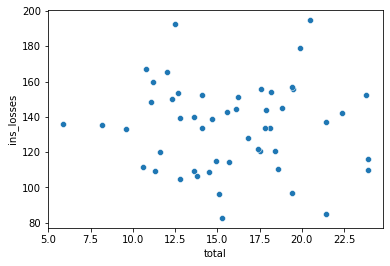

In [45]:
sns.scatterplot(x='total', y='ins_losses', data=df)

### Finally `fit()` the Model

In [46]:
model.fit(X=df[['ins_losses','total']])

KMeans(n_clusters=3)

## `predict()` the Cluster for One `USA State`

> **Programming thiking:**
>
> - Which `function()` can we use to make a prediction?
> - How can you answer yourself **without searching in Google**?

In [47]:
AL = df.loc[['AL'], ['ins_losses', 'total']]

In [48]:
AL

,ins_losses,total
abbrev,,
AL,145.08,18.8


In [49]:
model.predict(AL)

array([1], dtype=int32)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [50]:
pred = model.predict(X=df[['ins_losses', 'total']])

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [51]:
dfsel = df[['ins_losses', 'total']].copy()

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [52]:
dfsel['cluster'] = pred

In [53]:
dfsel.sample(5)

,ins_losses,total,cluster
abbrev,,,
MO,144.45,16.1,1
GA,142.80,15.6,1
AL,145.08,18.8,1
NE,114.82,14.9,0
DC,136.05,5.9,1


## Model Visualization

> - You may `hue=` the points with the `cluster` column

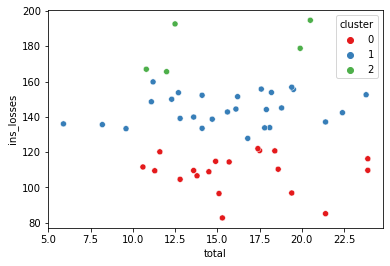

In [55]:
sns.scatterplot(x='total', y='ins_losses', data=df,hue=dfsel.cluster, palette='Set1');

## Model Interpretation

> - Do you think the model **makes sense**?
> - Which **variable is the most important** to determine the cluster?

In [59]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Conclusion

> - You need to `scale` the data
> - Every time the algorithm computes `distances`
> - Between `different variables`
> - Because it's **not the same to increase 1kg of weight than 1m of height**

In [4]:
# Draw Weight Height Axes Min Max Scaler 0 - 1

In [57]:
import matplotlib.pyplot as plt

(0.0, 200.0)

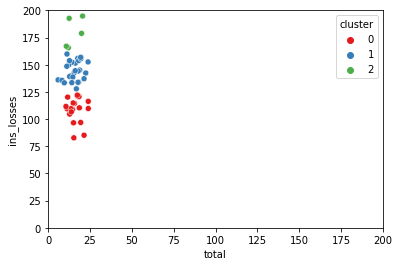

In [58]:
sns.scatterplot(x='total', y='ins_losses', data=df,hue=dfsel.cluster, palette='Set1');
plt.xlim(0, 200)
plt.ylim(0, 200)

# `MinMaxScaler()` the data

> - `scaler.fit_transform()`

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler=MinMaxScaler()

In [64]:
import pandas as pd

In [67]:
dfnorm = pd.DataFrame(scaler.fit_transform(X=df[['ins_losses', 'total']]), columns=['ins_losses', 'total'])

# `KMeans()` Model with *Scaled Data*

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [68]:
from sklearn.cluster import KMeans

In [69]:
model = KMeans(n_clusters=3)

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='total', ylabel='ins_losses'>

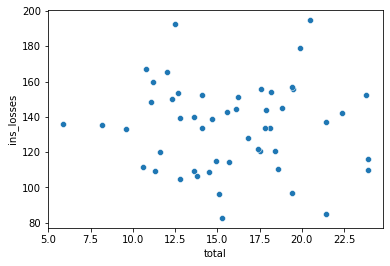

In [45]:
sns.scatterplot(x='total', y='ins_losses', data=df)

<AxesSubplot:xlabel='total', ylabel='ins_losses'>

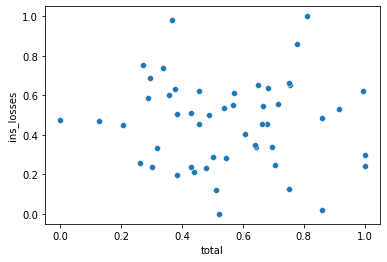

In [71]:
sns.scatterplot(x='total', y='ins_losses', data=dfnorm)

### Finally `fit()` the Model

In [72]:
model.fit(X=dfnorm)

KMeans(n_clusters=3)

## `predict()` the Cluster for One `USA State`

> **Programming thiking:**
>
> - Which `function()` can we use to make a prediction?
> - How can you answer yourself **without searching in Google**?

In [73]:
AL = df.loc[['AL'], ['ins_losses', 'total']]

In [74]:
AL

,ins_losses,total
abbrev,,
AL,145.08,18.8


In [75]:
model.predict(AL)

array([0], dtype=int32)

## Get the `cluster` for all USA States

> - `model.` + `↹`

In [76]:
pred = model.predict(X=dfnorm)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [77]:
dfsel = dfnorm.copy()

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [78]:
dfsel['cluster'] = pred

In [79]:
dfsel.sample(5)

,ins_losses,total,cluster
38,0.634741,0.683333,0
12,0.000000,0.522222,1
4,0.739802,0.338889,2
29,0.334375,0.316667,1
47,0.257699,0.261111,1


## Model Visualization

> - You may `hue=` the points with the `cluster` column

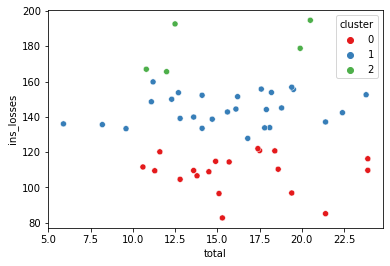

In [55]:
sns.scatterplot(x='total', y='ins_losses', data=df,hue=dfsel.cluster, palette='Set1');

In [81]:
model.__dict__

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'auto',
 'feature_names_in_': array(['ins_losses', 'total'], dtype=object),
 'n_features_in_': 2,
 '_n_init': 10,
 '_tol': 4.979778384529425e-06,
 '_algorithm': 'elkan',
 '_n_threads': 8,
 'cluster_centers_': array([[0.57753963, 0.76830065],
        [0.23509576, 0.53240741],
        [0.59408752, 0.33611111]]),
 'labels_': array([0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2,
        2, 2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0,
        1, 1, 2, 1, 0, 1, 1], dtype=int32),
 'inertia_': 2.098872340792318,
 'n_iter_': 2}

In [84]:
dfcentroides = pd.DataFrame(model.cluster_centers_, columns=['ins_losses', 'total'])

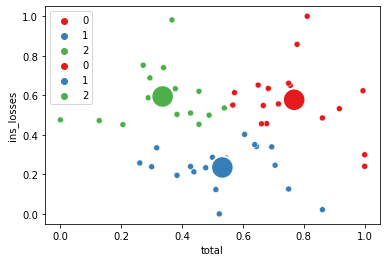

In [86]:
sns.scatterplot(x='total', y='ins_losses', data=dfsel,hue=dfsel.cluster, palette='Set1');
sns.scatterplot(x='total', y='ins_losses', data=dfcentroides,hue=dfcentroides.index, palette='Set1', s=500);

# Other `Clustering` Models in Python

> - Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
> - **Pick 2 new models** and compute the *Clustering*

## Other Model 1

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


## Other Model 2